In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sell_prices = pd.read_csv('/content/drive/MyDrive/Sales/sell_prices.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Sales/sample_submission.csv')
calendar = pd.read_csv('/content/drive/MyDrive/Sales/calendar.csv')
sales_train_validation = pd.read_csv('/content/drive/MyDrive/Sales/sales_train_validation.csv')


In [4]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [5]:
sell_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [6]:
sales_train_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [7]:
sales_train_validation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [8]:
sales_train_validation['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

# First, we do some pre-processing and exploration of the data.

In [9]:
sales_train_validation.groupby(sales_train_validation['store_id']).sum()

,id,item_id,dept_id,cat_id,state_id,d_1,d_2,d_3,d_4,d_5,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,HOBBIES_1_001_CA_1_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,4337,4155,2816,3051,2630,...,3982,5437,5954,4345,3793,3722,3709,4387,5577,6113
CA_2,HOBBIES_1_001_CA_2_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,3494,3046,2121,2324,1942,...,4440,5352,5760,3830,3631,3691,3303,4457,5884,6082
CA_3,HOBBIES_1_001_CA_3_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,4739,4827,3785,4232,3817,...,5337,6936,8271,6068,5683,5235,5018,5623,7419,7721
CA_4,HOBBIES_1_001_CA_4_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,1625,1777,1386,1440,1536,...,2496,2839,3047,2809,2677,2500,2458,2628,2954,3271
TX_1,HOBBIES_1_001_TX_1_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,2556,2687,1822,2258,1694,...,3084,3724,4192,3410,3257,2901,2776,3022,3700,4033
TX_2,HOBBIES_1_001_TX_2_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,3852,3937,2731,2954,2492,...,3897,4475,4998,3311,3727,3384,3446,3902,4483,4292
TX_3,HOBBIES_1_001_TX_3_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,3030,3006,2225,2169,1726,...,3819,4261,4519,3147,3938,3315,3380,3691,4083,3957
WI_1,HOBBIES_1_001_WI_1_validationHOBBIES_1_002_WI_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,2704,2194,1562,1251,2,...,3862,4862,4812,3236,3069,3242,3324,3991,4772,4874
WI_2,HOBBIES_1_001_WI_2_validationHOBBIES_1_002_WI_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,2256,1922,2018,2522,1175,...,6259,5579,5566,4347,4464,4194,4393,4988,5404,5127


In [10]:
#Aggregate by the store level for now
store_level = sales_train_validation.groupby(sales_train_validation['store_id']).sum()
store_level['d'] = store_level.index
store_levelt = store_level.transpose()
store_levelt['d'] = store_levelt.index
store_levelt

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,d
id,HOBBIES_1_001_CA_1_validationHOBBIES_1_002_CA_...,HOBBIES_1_001_CA_2_validationHOBBIES_1_002_CA_...,HOBBIES_1_001_CA_3_validationHOBBIES_1_002_CA_...,HOBBIES_1_001_CA_4_validationHOBBIES_1_002_CA_...,HOBBIES_1_001_TX_1_validationHOBBIES_1_002_TX_...,HOBBIES_1_001_TX_2_validationHOBBIES_1_002_TX_...,HOBBIES_1_001_TX_3_validationHOBBIES_1_002_TX_...,HOBBIES_1_001_WI_1_validationHOBBIES_1_002_WI_...,HOBBIES_1_001_WI_2_validationHOBBIES_1_002_WI_...,HOBBIES_1_001_WI_3_validationHOBBIES_1_002_WI_...,id
item_id,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,item_id
dept_id,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,dept_id
cat_id,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,cat_id
state_id,CACACACACACACACACACACACACACACACACACACACACACACA...,CACACACACACACACACACACACACACACACACACACACACACACA...,CACACACACACACACACACACACACACACACACACACACACACACA...,CACACACACACACACACACACACACACACACACACACACACACACA...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,state_id
...,...,...,...,...,...,...,...,...,...,...,...
d_1910,3709,3303,5018,2458,2776,3446,3380,3324,4393,3226,d_1910
d_1911,4387,4457,5623,2628,3022,3902,3691,3991,4988,3828,d_1911
d_1912,5577,5884,7419,2954,3700,4483,4083,4772,5404,4686,d_1912
d_1913,6113,6082,7721,3271,4033,4292,3957,4874,5127,4325,d_1913


In [11]:
store_level

,id,item_id,dept_id,cat_id,state_id,d_1,d_2,d_3,d_4,d_5,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,HOBBIES_1_001_CA_1_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,4337,4155,2816,3051,2630,...,5437,5954,4345,3793,3722,3709,4387,5577,6113,CA_1
CA_2,HOBBIES_1_001_CA_2_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,3494,3046,2121,2324,1942,...,5352,5760,3830,3631,3691,3303,4457,5884,6082,CA_2
CA_3,HOBBIES_1_001_CA_3_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,4739,4827,3785,4232,3817,...,6936,8271,6068,5683,5235,5018,5623,7419,7721,CA_3
CA_4,HOBBIES_1_001_CA_4_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,1625,1777,1386,1440,1536,...,2839,3047,2809,2677,2500,2458,2628,2954,3271,CA_4
TX_1,HOBBIES_1_001_TX_1_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,2556,2687,1822,2258,1694,...,3724,4192,3410,3257,2901,2776,3022,3700,4033,TX_1
TX_2,HOBBIES_1_001_TX_2_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,3852,3937,2731,2954,2492,...,4475,4998,3311,3727,3384,3446,3902,4483,4292,TX_2
TX_3,HOBBIES_1_001_TX_3_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,3030,3006,2225,2169,1726,...,4261,4519,3147,3938,3315,3380,3691,4083,3957,TX_3
WI_1,HOBBIES_1_001_WI_1_validationHOBBIES_1_002_WI_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,2704,2194,1562,1251,2,...,4862,4812,3236,3069,3242,3324,3991,4772,4874,WI_1
WI_2,HOBBIES_1_001_WI_2_validationHOBBIES_1_002_WI_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,2256,1922,2018,2522,1175,...,5579,5566,4347,4464,4194,4393,4988,5404,5127,WI_2


In [12]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [13]:
#Merge this with the calendar data set to look at trends
store_level_final = store_levelt.merge(calendar, on='d')
from datetime import datetime
store_level_final['date'] = store_level_final['date'].apply(lambda t: datetime.strptime(t, '%Y-%m-%d'))
store_level_final

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198,...,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317,...,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211,...,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,2630,1942,3817,1536,1694,2492,1726,2,1175,2132,...,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,3722,3691,5235,2500,2901,3384,3315,3242,4194,3159,...,5,4,2016,NaN,NaN,NaN,NaN,0,0,0
1909,3709,3303,5018,2458,2776,3446,3380,3324,4393,3226,...,6,4,2016,NaN,NaN,NaN,NaN,0,0,0
1910,4387,4457,5623,2628,3022,3902,3691,3991,4988,3828,...,7,4,2016,NaN,NaN,NaN,NaN,0,0,0
1911,5577,5884,7419,2954,3700,4483,4083,4772,5404,4686,...,1,4,2016,NaN,NaN,NaN,NaN,0,0,0


In [14]:
store_levelt.merge(calendar, on='d')

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198,...,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317,...,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211,...,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,2630,1942,3817,1536,1694,2492,1726,2,1175,2132,...,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,3722,3691,5235,2500,2901,3384,3315,3242,4194,3159,...,5,4,2016,NaN,NaN,NaN,NaN,0,0,0
1909,3709,3303,5018,2458,2776,3446,3380,3324,4393,3226,...,6,4,2016,NaN,NaN,NaN,NaN,0,0,0
1910,4387,4457,5623,2628,3022,3902,3691,3991,4988,3828,...,7,4,2016,NaN,NaN,NaN,NaN,0,0,0
1911,5577,5884,7419,2954,3700,4483,4083,4772,5404,4686,...,1,4,2016,NaN,NaN,NaN,NaN,0,0,0


In [15]:
store_level_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CA_1          1913 non-null   object        
 1   CA_2          1913 non-null   object        
 2   CA_3          1913 non-null   object        
 3   CA_4          1913 non-null   object        
 4   TX_1          1913 non-null   object        
 5   TX_2          1913 non-null   object        
 6   TX_3          1913 non-null   object        
 7   WI_1          1913 non-null   object        
 8   WI_2          1913 non-null   object        
 9   WI_3          1913 non-null   object        
 10  d             1913 non-null   object        
 11  date          1913 non-null   datetime64[ns]
 12  wm_yr_wk      1913 non-null   int64         
 13  weekday       1913 non-null   object        
 14  wday          1913 non-null   int64         
 15  month         1913 non-null   int64   

There are clear seasonal trends, particularly within the week. Saturday and Sunday see much higher volumes.

(array([15006., 15013., 15020., 15027., 15034., 15041., 15048.]),
 [Text(15006.0, 0, '2011-02-01'),
  Text(15013.0, 0, '2011-02-08'),
  Text(15020.0, 0, '2011-02-15'),
  Text(15027.0, 0, '2011-02-22'),
  Text(15034.0, 0, '2011-03-01'),
  Text(15041.0, 0, '2011-03-08'),
  Text(15048.0, 0, '2011-03-15')])

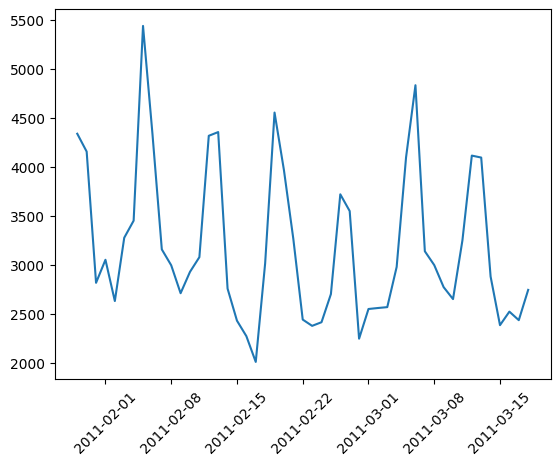

In [16]:
plt.plot(store_level_final['date'][0:49], store_level_final['CA_1'][0:49])
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Friday')])

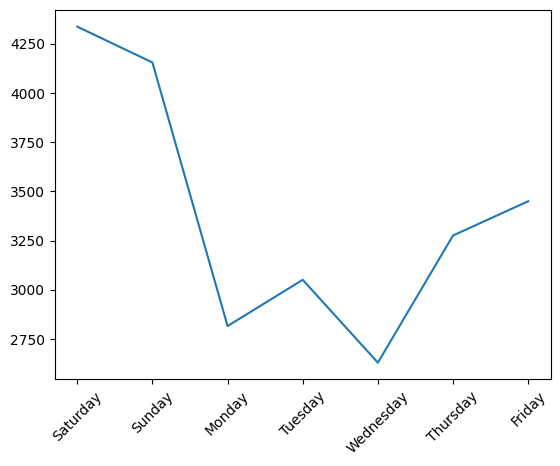

In [17]:
plt.plot(store_level_final['weekday'][0:7], store_level_final['CA_1'][0:7])
plt.xticks(rotation=45)

# Second, we look at the time series through ARIMA model.

In [18]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(7).mean()
    rolstd = timeseries.rolling(7).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries[0:100], color='blue',label='Original')
    mean = plt.plot(rolmean[0:100], color='red', label='Rolling Mean')
    std = plt.plot(rolstd[0:100], color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

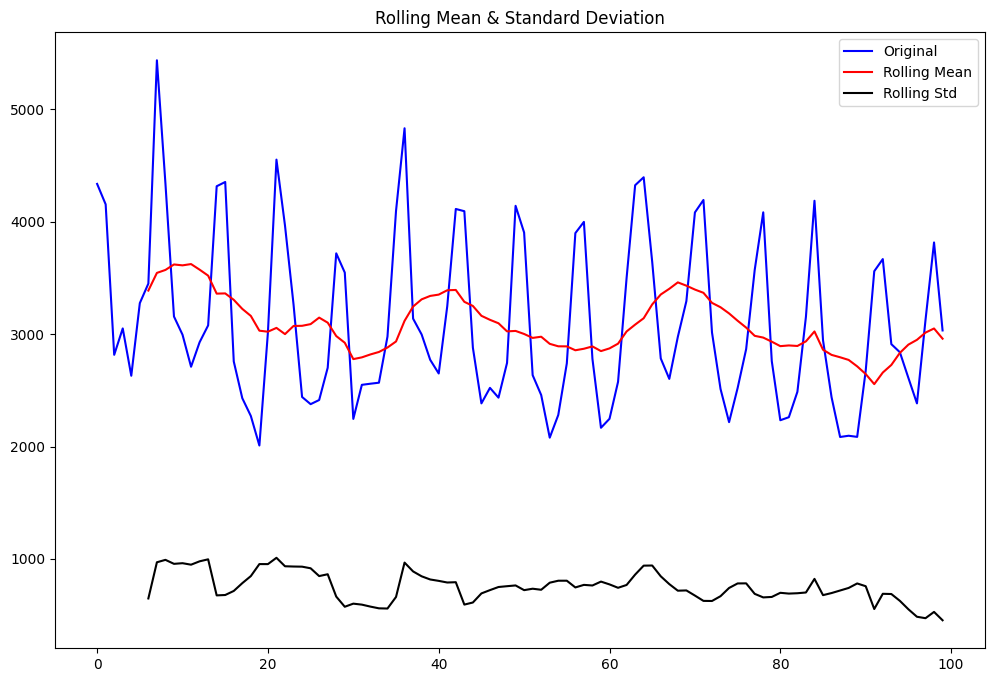

Results of Dickey-Fuller Test:
Test Statistic                 -2.461764
p-value                         0.125057
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


In [19]:
test_stationarity(store_level_final['CA_1'][0:100])

We dont need to reject the null hypothesis and it is a good candidate to work with the ARIMA model.

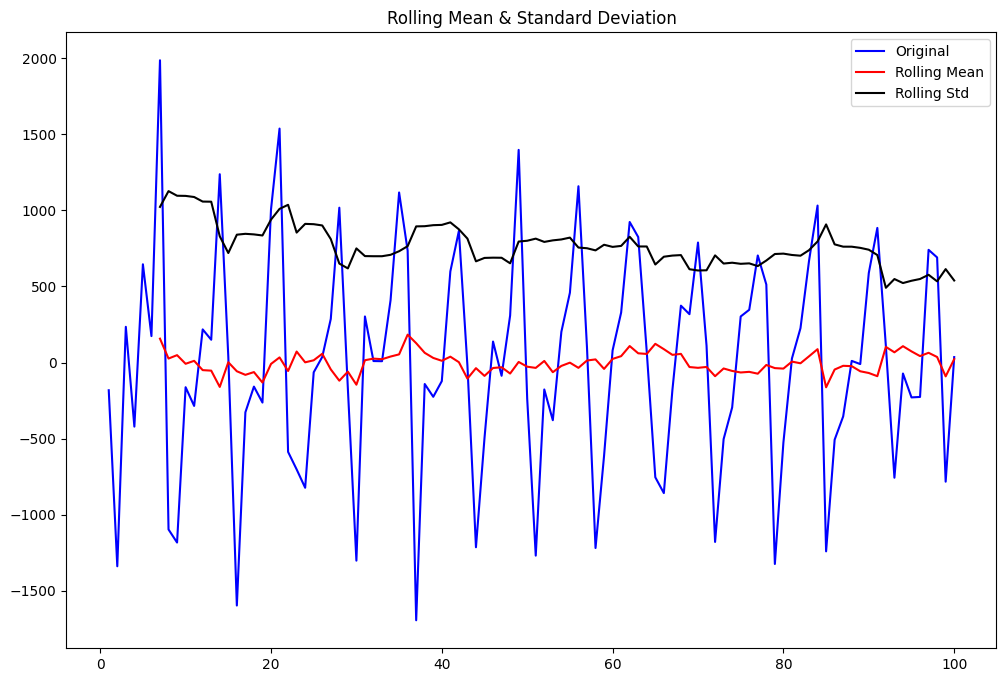

Results of Dickey-Fuller Test:
Test Statistic                  -20.626012
p-value                           0.000000
#Lags Used                       26.000000
Number of Observations Used    1885.000000
Critical Value (1%)              -3.433824
Critical Value (5%)              -2.863075
Critical Value (10%)             -2.567587
dtype: float64


In [20]:
store_level_final['first_difference'] = store_level_final['CA_1'] - store_level_final['CA_1'].shift(1)
test_stationarity(store_level_final['first_difference'].dropna())

### Let us see for Weekly differences
From previous analysis, it is clear that people shop more on the weekend. What if we difference to account for the weekly seasonality?

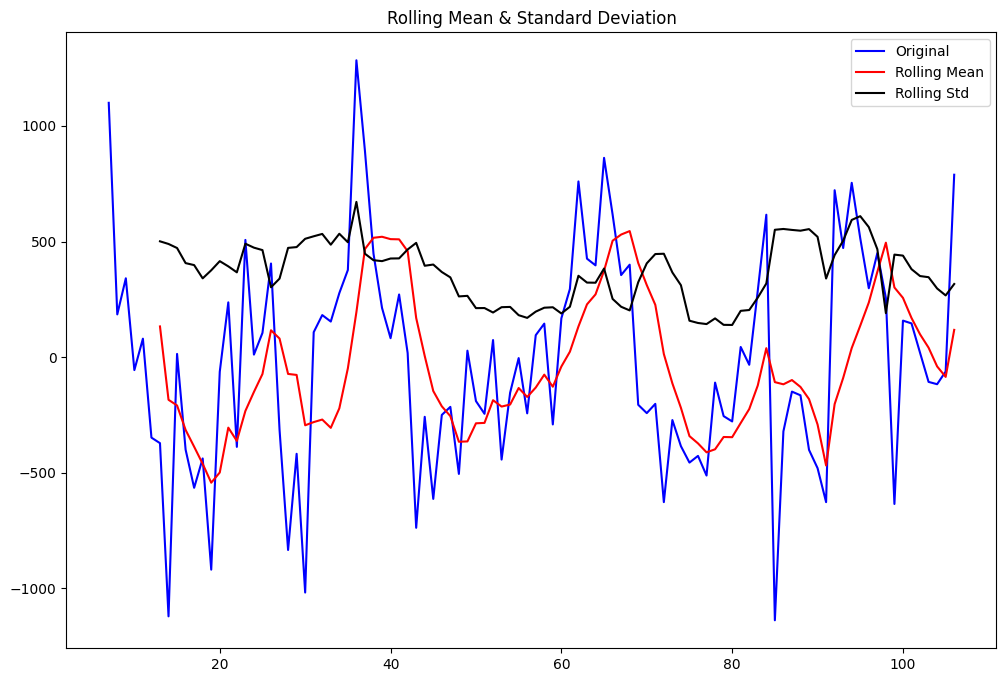

Results of Dickey-Fuller Test:
Test Statistic                  -19.400488
p-value                           0.000000
#Lags Used                       23.000000
Number of Observations Used    1882.000000
Critical Value (1%)              -3.433829
Critical Value (5%)              -2.863077
Critical Value (10%)             -2.567588
dtype: float64


In [21]:
store_level_final['seasonal_difference'] = store_level_final['CA_1'] - store_level_final['CA_1'].shift(7)
test_stationarity(store_level_final['seasonal_difference'].dropna())

In [22]:
store_level_final['CA_1'].shift(7)

,CA_1
0,None
1,None
2,None
3,None
4,None
...,...
1908,3478
1909,3637
1910,3982
1911,5437


We also fail to reject the null hypothesis here. Let's combine the two.


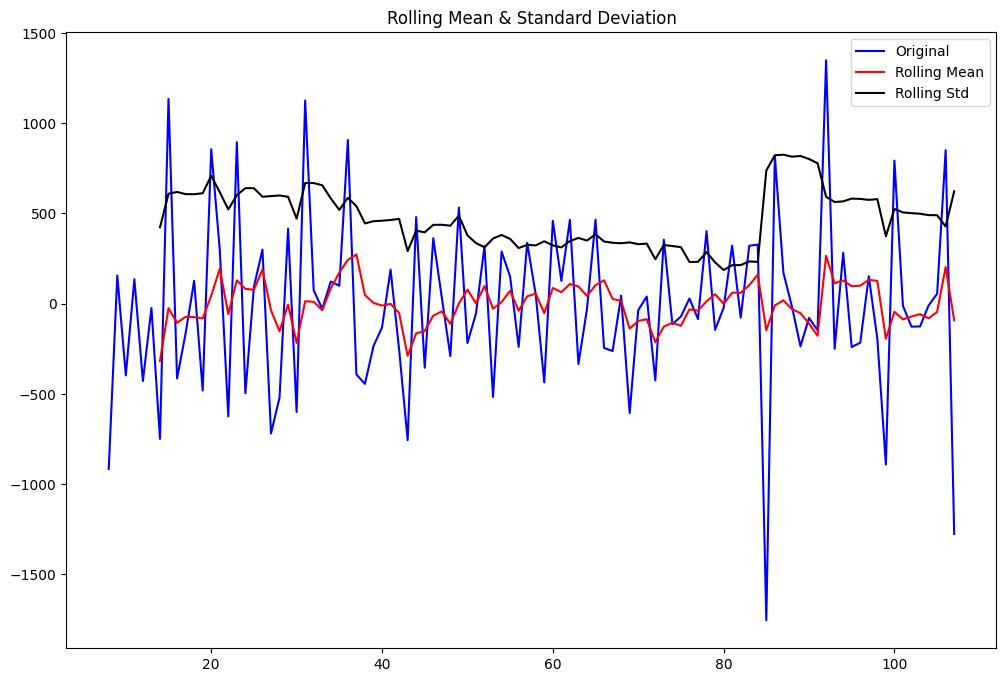

Results of Dickey-Fuller Test:
Test Statistic                  -19.739548
p-value                           0.000000
#Lags Used                       25.000000
Number of Observations Used    1879.000000
Critical Value (1%)              -3.433835
Critical Value (5%)              -2.863079
Critical Value (10%)             -2.567590
dtype: float64


In [23]:
store_level_final['seasonal_first_difference'] = store_level_final['CA_1'] - store_level_final['CA_1'].shift(1) - store_level_final['CA_1'].shift(7) + store_level_final['CA_1'].shift(8)
test_stationarity(store_level_final['seasonal_first_difference'].dropna())


At this point, I think we will use the third time series because it makes the most sense. But let us set the parameters, which will give further insight.

In [24]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

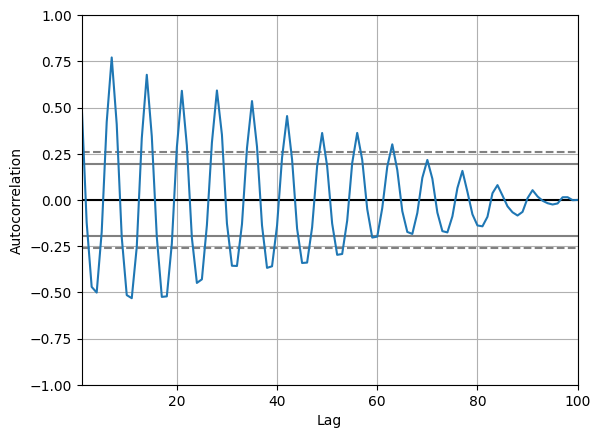

In [25]:
autocorrelation_plot(store_level_final['CA_1'][0:100])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

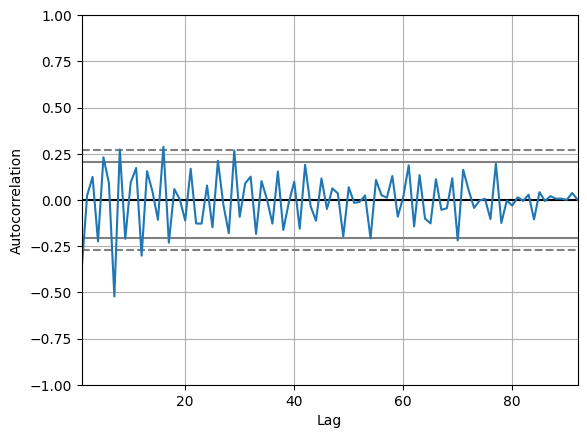

In [26]:
autocorrelation_plot(store_level_final['seasonal_first_difference'][8:100])

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

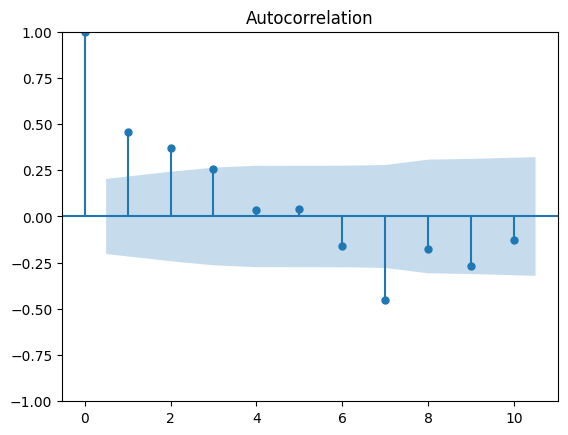

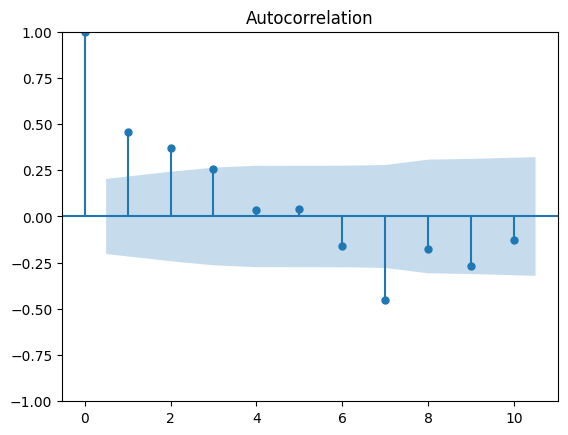

In [28]:
plot_acf(store_level_final['seasonal_difference'][0:100].dropna(), lags=10)

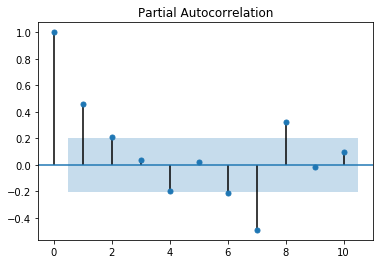

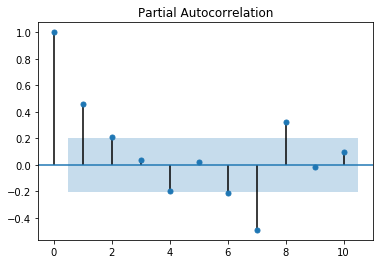

In [ ]:
plot_pacf(store_level_final['seasonal_difference'][0:100].dropna(), lags=10)

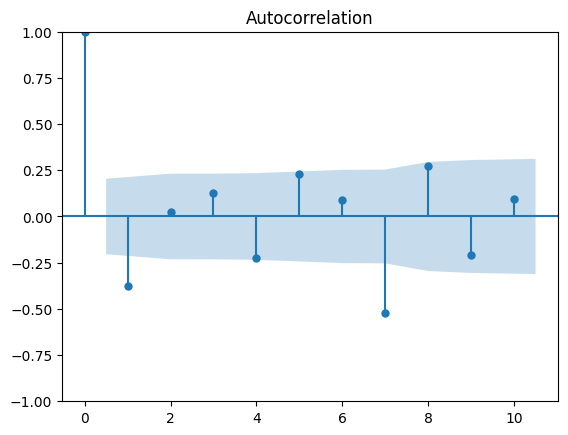

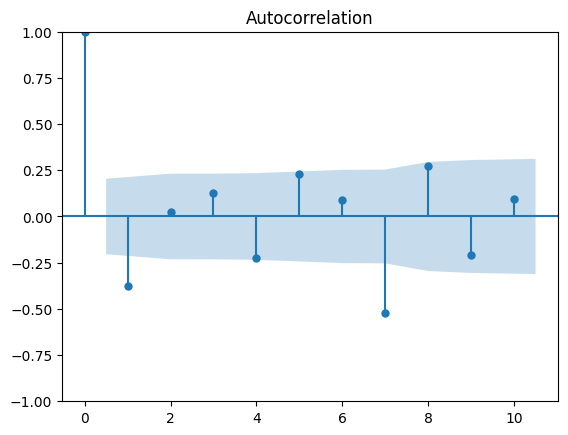

In [29]:
plot_acf(store_level_final['seasonal_first_difference'][0:100].dropna(), lags=10)

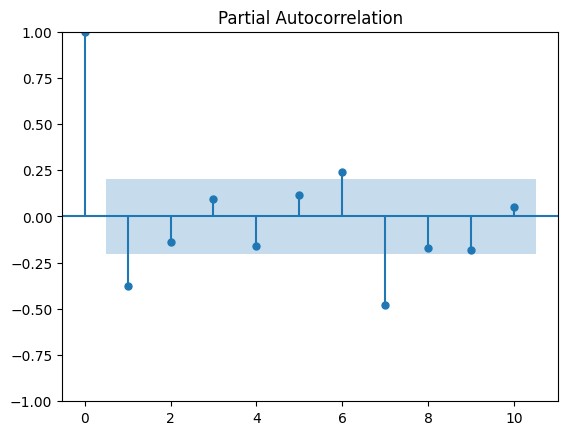

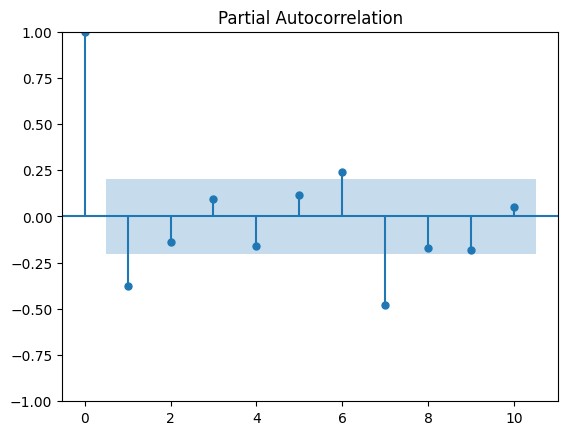

In [30]:
plot_pacf(store_level_final['seasonal_first_difference'][0:100].dropna(), lags=10)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(store_level_final['CA_1'])

Based on the spikes at 1 for all the graphs above, as well as the spike at 7, we use a ARIMA model of (0, 1, 1)(0, 1, 1)7.

[](http://)

In [32]:
train = np.asarray(store_level_final['CA_1'][0:1880].astype(float))
test = np.asarray(store_level_final['CA_1'][1880:-1].astype(float))

In [33]:
# print(store_level_final['CA_1'][0:18])
# print(store_level_final['CA_1'][18:-1])

In [34]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train, order=(0,1,1), seasonal_order=(0,1,1,7))
results=mod.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1880
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood              -14119.716
Date:                           Mon, 21 Oct 2024   AIC                          28245.432
Time:                                   05:09:30   BIC                          28262.036
Sample:                                        0   HQIC                         28251.549
                                          - 1880                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7561      0.012    -63.659      0.000      -0.779      -0.733
ma.S.L7       -0.9588      0.008   -124.950

The fit is pretty good...

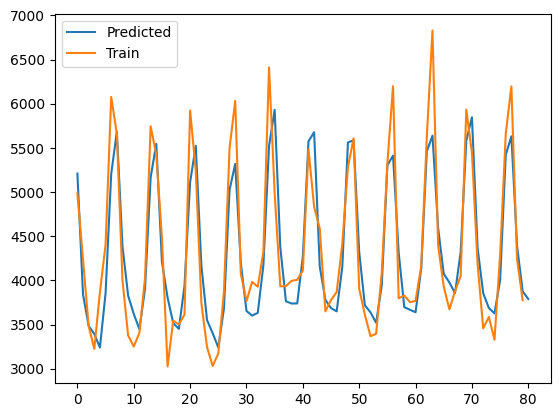

In [35]:
plt.plot(results.predict(start = 1800, end = 1880), label = 'Predicted')
plt.plot(train[1800:1880], label = 'Train')
plt.legend(loc = "upper left")

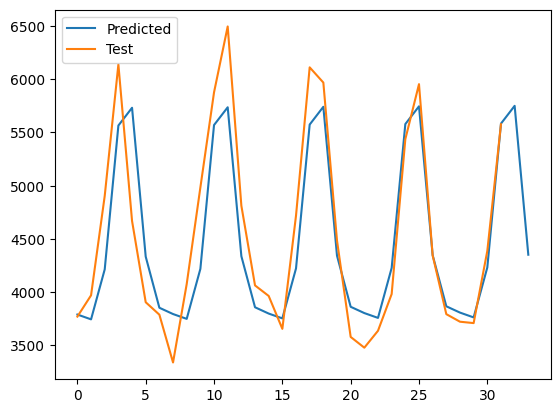

In [36]:
plt.plot(results.predict(start = len(train), end = len(store_level_final['CA_1'])), label = 'Predicted')
plt.plot(test, label = 'Test')
plt.legend(loc = 'upper left')

In [37]:
from sklearn.metrics import mean_squared_error
import math
mean_squared_error(results.predict(start = 1880, end = 1911), test)

156879.3356492372

In [38]:
train2 = np.asarray(store_level_final['CA_1'][1500:1880].astype(float))
test2 = np.asarray(store_level_final['CA_1'][1880:-1].astype(float))

In [39]:
import statsmodels.api as sm

mod2 = sm.tsa.statespace.SARIMAX(train2, order=(0,1,1), seasonal_order=(0,1,1,7))
results2=mod2.fit()
print(results2.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  380
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -2831.597
Date:                           Mon, 21 Oct 2024   AIC                           5669.195
Time:                                   05:09:48   BIC                           5680.951
Sample:                                        0   HQIC                          5673.864
                                           - 380                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8420      0.024    -34.935      0.000      -0.889      -0.795
ma.S.L7       -0.9014      0.025    -35.491

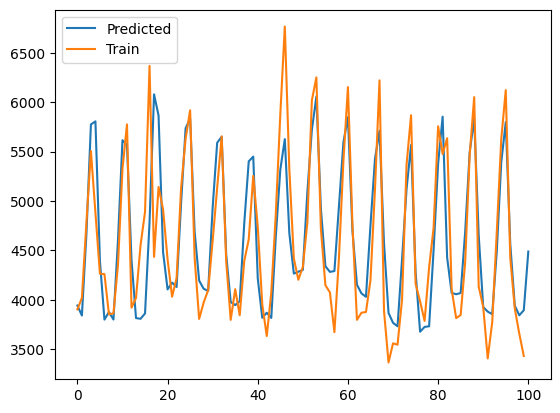

In [40]:
plt.plot(results2.predict(start = 100, end = 200), label = 'Predicted')
plt.plot(train2[100:200], label = 'Train')
plt.legend(loc = "upper left")

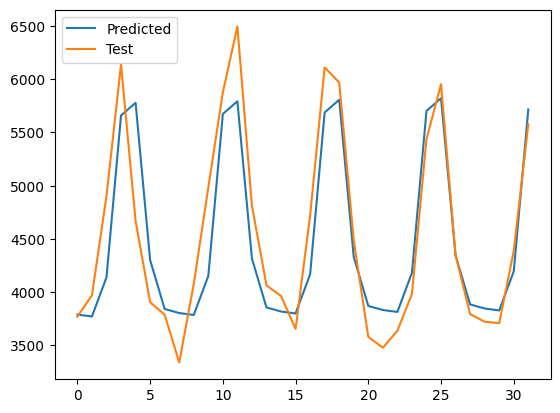

In [41]:
plt.plot(results2.predict(start = 380, end = 411), label = 'Predicted')
plt.plot(test2, label = 'Test')
plt.legend(loc = "upper left")

In [42]:
mean_squared_error(results2.predict(start = 380, end = 411), test2)

159455.6670315322

In [43]:
store_level

,id,item_id,dept_id,cat_id,state_id,d_1,d_2,d_3,d_4,d_5,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,HOBBIES_1_001_CA_1_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,4337,4155,2816,3051,2630,...,5437,5954,4345,3793,3722,3709,4387,5577,6113,CA_1
CA_2,HOBBIES_1_001_CA_2_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,3494,3046,2121,2324,1942,...,5352,5760,3830,3631,3691,3303,4457,5884,6082,CA_2
CA_3,HOBBIES_1_001_CA_3_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,4739,4827,3785,4232,3817,...,6936,8271,6068,5683,5235,5018,5623,7419,7721,CA_3
CA_4,HOBBIES_1_001_CA_4_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,1625,1777,1386,1440,1536,...,2839,3047,2809,2677,2500,2458,2628,2954,3271,CA_4
TX_1,HOBBIES_1_001_TX_1_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,2556,2687,1822,2258,1694,...,3724,4192,3410,3257,2901,2776,3022,3700,4033,TX_1
TX_2,HOBBIES_1_001_TX_2_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,3852,3937,2731,2954,2492,...,4475,4998,3311,3727,3384,3446,3902,4483,4292,TX_2
TX_3,HOBBIES_1_001_TX_3_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,3030,3006,2225,2169,1726,...,4261,4519,3147,3938,3315,3380,3691,4083,3957,TX_3
WI_1,HOBBIES_1_001_WI_1_validationHOBBIES_1_002_WI_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,2704,2194,1562,1251,2,...,4862,4812,3236,3069,3242,3324,3991,4772,4874,WI_1
WI_2,HOBBIES_1_001_WI_2_validationHOBBIES_1_002_WI_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,2256,1922,2018,2522,1175,...,5579,5566,4347,4464,4194,4393,4988,5404,5127,WI_2


# Now for Category wise projections
(before we had store wise)

In [44]:
category_sales = sales_train_validation.groupby(sales_train_validation['cat_id']).sum()
category_salest = category_sales.transpose()
category_salest['d'] = category_salest.index

In [45]:
#Merge this with the calendar data set to look at trends
category_level_final = category_salest.merge(calendar, on='d')
category_level_final['date'] = category_level_final['date'].apply(lambda t: datetime.strptime(t, '%Y-%m-%d'))
category_level_final

,FOODS,HOBBIES,HOUSEHOLD,d,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,23178,3764,5689,d_1,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,22758,3357,5634,d_2,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,17174,2682,3927,d_3,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,18878,2669,3865,d_4,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,14603,1814,2729,d_5,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,23632,3472,8239,d_1909,2016-04-20,11612,Wednesday,5,4,2016,NaN,NaN,NaN,NaN,0,0,0
1909,23317,3353,8363,d_1910,2016-04-21,11612,Thursday,6,4,2016,NaN,NaN,NaN,NaN,0,0,0
1910,26704,4085,9728,d_1911,2016-04-22,11612,Friday,7,4,2016,NaN,NaN,NaN,NaN,0,0,0
1911,31927,4787,12248,d_1912,2016-04-23,11613,Saturday,1,4,2016,NaN,NaN,NaN,NaN,0,0,0


In [56]:
category_level_model = category_level_final
category_level_model['FOODS'].loc[category_level_model['event_name_1'] == 'Christmas'] = category_level_final['FOODS'].mean()
category_level_model['HOBBIES'].loc[category_level_model['event_name_1'] == 'Christmas'] = category_level_final['HOBBIES'].mean()
category_level_model['HOUSEHOLD'].loc[category_level_model['event_name_1'] == 'Christmas'] = category_level_final['HOUSEHOLD'].mean()

<ipython-input-56-f417c71e3482>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  category_level_model['FOODS'].loc[category_level_model['event_name_1'] == 'Christmas'] = category_level_final['FOODS'].mean()
<ipython-input-56-f417c71e3482>:2:

In [57]:
category_level_model

,FOODS,HOBBIES,HOUSEHOLD,d,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,23178,3764,5689,d_1,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,22758,3357,5634,d_2,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,17174,2682,3927,d_3,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,18878,2669,3865,d_4,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,14603,1814,2729,d_5,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,23632,3472,8239,d_1909,2016-04-20,11612,Wednesday,5,4,2016,NaN,NaN,NaN,NaN,0,0,0
1909,23317,3353,8363,d_1910,2016-04-21,11612,Thursday,6,4,2016,NaN,NaN,NaN,NaN,0,0,0
1910,26704,4085,9728,d_1911,2016-04-22,11612,Friday,7,4,2016,NaN,NaN,NaN,NaN,0,0,0
1911,31927,4787,12248,d_1912,2016-04-23,11613,Saturday,1,4,2016,NaN,NaN,NaN,NaN,0,0,0


Text(0.5, 1.0, 'Food: SARIMA Model Prediction vs. Test with RMSE = 2589')

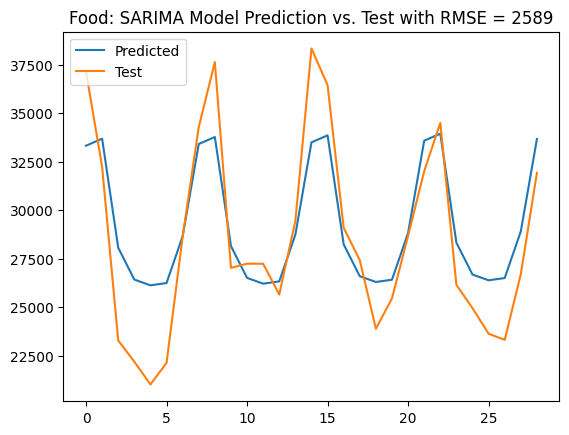

In [58]:
train_food = np.asarray(category_level_model['FOODS'][0:1883].astype(float))
test_food = np.asarray(category_level_model['FOODS'][1883:-1].astype(float))

mod_food = sm.tsa.statespace.SARIMAX(train_food, order=(0,1,1), seasonal_order=(0,1,1,7))
results_food=mod_food.fit()
plt.plot(results_food.predict(start = len(train_food), end = 1911), label = 'Predicted')
plt.plot(test_food, label = 'Test')
plt.legend(loc = 'upper left')
rmse = math.sqrt(mean_squared_error(results_food.predict(start = 1883, end = 1911), test_food))
plt.title("Food: SARIMA Model Prediction vs. Test with RMSE = " + "{:.0f}".format(rmse))


In [59]:
# rmse / np.std(train_food)

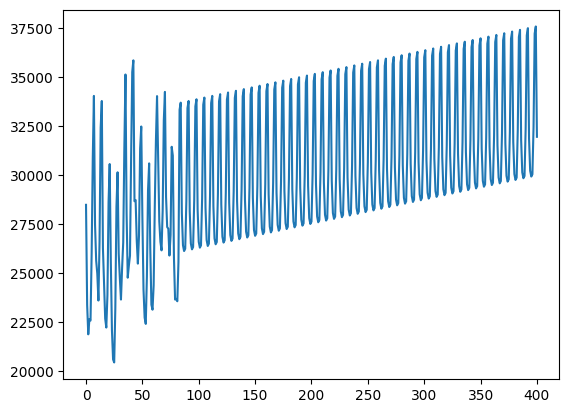

In [60]:
plt.plot(results_food.predict(start = 1800, end = 2200), label = 'Predicted')


Text(0.5, 1.0, 'Hobbies: SARIMA Model Prediction vs. Test with RMSE = 316')

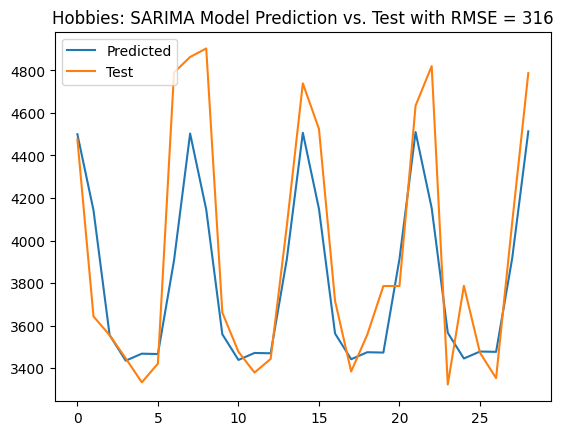

In [61]:
train_hobbies = np.asarray(category_level_model['HOBBIES'][0:1883].astype(float))
test_hobbies = np.asarray(category_level_model['HOBBIES'][1883:-1].astype(float))
mod_hobbies = sm.tsa.statespace.SARIMAX(train_hobbies, order=(0,1,1), seasonal_order=(0,1,1,7))
results_hobbies = mod_hobbies.fit()
plt.plot(results_hobbies.predict(start = len(train_hobbies), end = 1911), label = 'Predicted')
plt.plot(test_hobbies, label = 'Test')
plt.legend(loc = 'upper left')
rmse = math.sqrt(mean_squared_error(results_hobbies.predict(start = 1883, end = 1911), test_hobbies))
plt.title("Hobbies: SARIMA Model Prediction vs. Test with RMSE = " + "{:.0f}".format(rmse))

Text(0.5, 1.0, 'Household: SARIMA Model Prediction vs. Test with RMSE = 820')

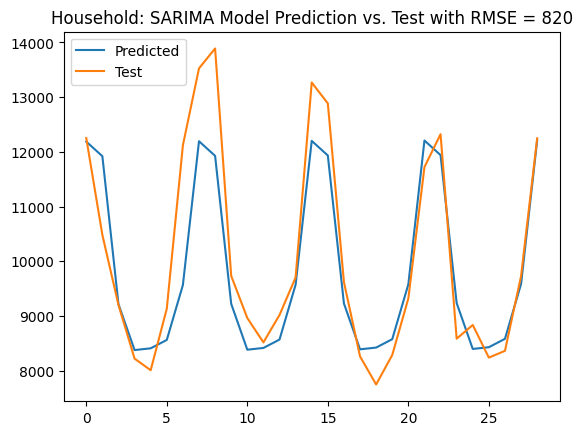

In [62]:
train_household = np.asarray(category_level_final['HOUSEHOLD'][0:1883].astype(float))
test_household = np.asarray(category_level_final['HOUSEHOLD'][1883:-1].astype(float))
mod_household = sm.tsa.statespace.SARIMAX(train_household, order=(0,1,1), seasonal_order=(0,1,1,7))
results_household = mod_household.fit()
plt.plot(results_household.predict(start = len(train_household), end = 1911), label = 'Predicted')
plt.plot(test_household, label = 'Test')
plt.legend(loc = 'upper left')
rmse = math.sqrt(mean_squared_error(results_household.predict(start = 1883, end = 1911), test_household))
plt.title("Household: SARIMA Model Prediction vs. Test with RMSE = " + "{:.0f}".format(rmse))

## Now let us look at exponential smoothening curves

#### HOLT-WINTER

In [63]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [64]:
model_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=8)
fit_hw = model_hw.fit()
print(fit_hw.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                 1880
Model:             ExponentialSmoothing   SSE                     1434905216.521
Optimized:                         True   AIC                          25489.235
Trend:                         Additive   BIC                          25555.703
Seasonal:                      Additive   AICC                         25489.460
Seasonal Periods:                     8   Date:                 Mon, 21 Oct 2024
Box-Cox:                          False   Time:                         05:13:52
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8889286                alpha                 True
smoothing_trend          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


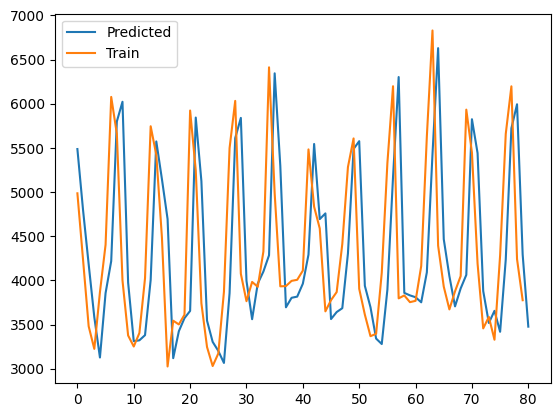

In [65]:
plt.plot(fit_hw.predict(start = 1800, end = 1880), label = 'Predicted')
plt.plot(train[1800:1880], label = 'Train')
plt.legend(loc = "upper left")

Reasonable plot for train vs predicted.

In [69]:
rmse = math.sqrt(mean_squared_error(fit_hw.predict(start = 1880, end = 1911), test))

In [70]:
rmse

1531.310038050406